# Computer Vision 서비스로 이미지 분석

![그림을 들고 있는 로봇](./images/computer_vision.jpg)

*Computer Vision*은 카메라를 통해 실시간으로 또는 이미지와 동영상을 분석하여 세계를 볼 수 있는 AI 시스템의 개발을 탐구하는 AI(인공 지능)의 한 부문입니다. 이는 디지털 이미지가 본질적으로 숫자 픽셀 값의 배열에 지나지 않기 때문입니다. 그리고 이러한 픽셀 값은 이미지를 분류하고, 이미지에서 개별 물체를 감지하고, 심지어 텍스트 기반의 사진 요약을 생성할 수 있는 기계 학습 모델을 학습시키기 위한 *특성*으로 사용될 수 있습니다.

## Computer Vision Cognitive Service 사용

Microsoft Azure에는 일반적인 AI 기능을 캡슐화하는 여러 가지 *Cognitive Services*가 포함되어 있으며, 그중 일부는 Computer Vision 솔루션을 구축하는 데 도움이 될 수 있습니다.

*Computer Vision* Cognitive Service는 Azure에서 Computer Vision을 탐구하기 위한 확실한 출발점을 제공합니다. 사전 학습된 기계 학습 모델을 사용하여 이미지를 분석하고 이미지에 대한 정보를 추출합니다.

예를 들어 Northwind Traders가 AI 서비스를 통해 매장을 모니터링하여 도움이 필요한 고객을 파악하고 직원을 보내 돕도록 하는 "스마트 스토어"를 구현하기로 결정했다고 가정해 보겠습니다. Computer Vision 서비스를 사용하면 매장 전체에서 카메라가 촬영한 이미지를 분석하여 이미지에 묘사된 내용에 대한 의미 있는 설명을 제공할 수 있습니다.

### Cognitive Services 리소스 만들기

먼저 Azure 구독에서 **Cognitive Services** 리소스를 만들어 보겠습니다.

1. 다른 브라우저 탭에서 Azure Portal(https://portal.azure.com) 을 열고 Microsoft 계정으로 로그인합니다.
2. **&#65291;리소스 만들기** 단추를 클릭하고, *Cognitive Services*를 검색하고, 다음 설정을 사용하여 **Cognitive Services** 리소스를 만듭니다.
    - **구독**: *사용자의 Azure 구독*.
    - **리소스 그룹**: *고유한 이름의 새 리소스 그룹을 선택하거나 만듭니다*.
    - **지역**: *사용 가능한 지역을 선택합니다*.
    - **이름**: *고유한 이름을 입력합니다*.
    - **가격 책정 계층**: S0
    - **알림을 읽고 이해했음을 확인합니다**. 선택됨.
3. 배포가 완료될 때까지 기다립니다. 그런 다음에 Cognitive Services 리소스로 이동하고, **개요** 페이지에서 링크를 클릭하여 서비스의 키를 관리합니다. 클라이언트 애플리케이션에서 Cognitive Services 리소스에 연결하려면 엔드포인트 및 키가 필요합니다.

### Cognitive Services 리소스의 키 및 엔드포인트 가져오기

Cognitive Services 리소스를 사용하려면 클라이언트 애플리케이션에 해당 엔드포인트 및 인증 키가 필요합니다.

1. Azure Portal에 있는 Cognitive Service 리소스의 **키 및 엔드포인트** 페이지에서 리소스의 **Key1**을 복사하고 아래 코드에 붙여 넣어 **YOUR_COG_KEY**를 대체합니다.
2. 리소스의 **엔드포인트**를 복사하고 아래 코드에 붙여 넣어 **YOUR_COG_ENDPOINT**를 대체합니다.
3. 셀을 선택한 다음 셀 왼쪽의 **셀 실행**(&#9655;) 단추를 클릭하여 아래 코드를 실행합니다.

In [1]:
cog_key = '149b9a076c7d48dd98f306cec2e540c4'
cog_endpoint = 'https://ai-900-kwcgs.cognitiveservices.azure.com/'

print('Ready to use cognitive services at {} using key {}'.format(cog_endpoint, cog_key))

Ready to use cognitive services at https://ai-900-kwcgs.cognitiveservices.azure.com/ using key 149b9a076c7d48dd98f306cec2e540c4


이제 키와 엔드포인트를 설정했으므로 Computer Vision 서비스를 사용하여 이미지를 분석할 수 있습니다.

다음 셀을 실행하여 */data/vision/store_cam1.jpg* 파일에서 이미지의 설명을 가져옵니다.

data/vision/store_cam1.jpg
{'additional_properties': {}, 'tags': ['text', 'person', 'woman', 'store', 'shop'], 'captions': [<azure.cognitiveservices.vision.computervision.models._models_py3.ImageCaption object at 0x7f7eb0281f10>], 'request_id': '7797c98b-3774-4e03-830e-70b5c267b454', 'metadata': <azure.cognitiveservices.vision.computervision.models._models_py3.ImageMetadata object at 0x7f7eb0281190>, 'model_version': '2021-05-01'}


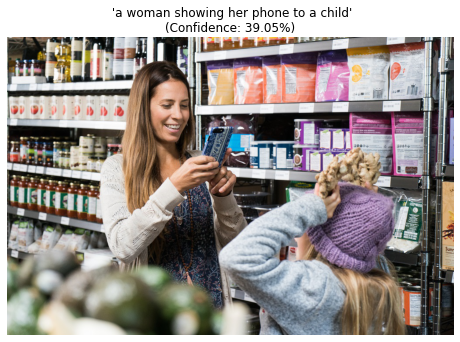

In [4]:
from azure.cognitiveservices.vision.computervision import ComputerVisionClient
from msrest.authentication import CognitiveServicesCredentials
from python_code import vision
import os
# % = 매직커맨드
%matplotlib inline

# Get the path to an image file
image_path = os.path.join('data', 'vision', 'store_cam1.jpg')

# 경로를 나타냄
print(image_path)

# Get a client for the computer vision service
computervision_client = ComputerVisionClient(cog_endpoint, CognitiveServicesCredentials(cog_key))

# Get a description from the computer vision service
image_stream = open(image_path, "rb")
description = computervision_client.describe_image_in_stream(image_stream)
print(description)

# Display image and caption (code in helper_scripts/vision.py)
vision.show_image_caption(image_path, description)


꽤 정확한 것 같습니다.

다른 이미지를 시도해 보겠습니다.

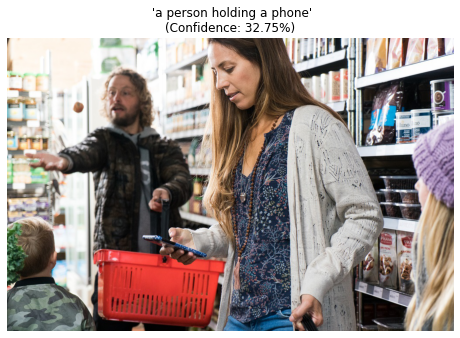

In [5]:
# Get the path to an image file
image_path = os.path.join('data', 'vision', 'store_cam2.jpg')

# Get a description from the computer vision service
image_stream = open(image_path, "rb")
description = computervision_client.describe_image_in_stream(image_stream)

# Display image and caption (code in helper_scripts/vision.py)
vision.show_image_caption(image_path, description)

이번에도 제안된 캡션이 꽤 정확한 것 같습니다.

## 이미지 특성 분석

지금까지 Computer Vision 서비스를 사용하여 몇 개의 이미지에 대한 설명 캡션을 생성했는데, 이 외에도 많은 것들을 할 수 있습니다. Computer Vision 서비스는 다음과 같은 세부 정보를 추출할 수 있는 분석 기능을 제공합니다.

- 이미지에서 감지된 일반적인 물체 유형의 위치.
- 이미지에 나오는 사람 얼굴의 위치와 대략적인 나이.
- 이미지에 '성인물', '선정성' 또는 '폭력성' 콘텐츠가 포함되어 있는지 여부.
- 찾기 쉽도록 데이터베이스에 있는 이미지와 연관시킬 수 있는 관련 태그.

다음 코드를 실행하여 쇼핑객의 이미지를 분석하세요.

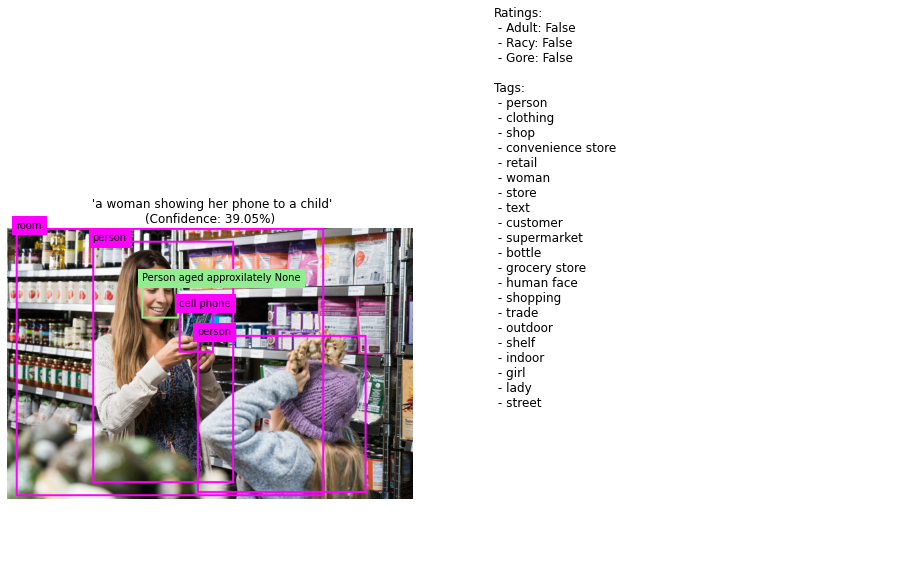

In [6]:
# Get the path to an image file
image_path = os.path.join('data', 'vision', 'store_cam1.jpg')

# Specify the features we want to analyze
features = ['Description', 'Tags', 'Adult', 'Objects', 'Faces']

# Get an analysis from the computer vision service
image_stream = open(image_path, "rb")
analysis = computervision_client.analyze_image_in_stream(image_stream, visual_features=features)

# Show the results of analysis (code in helper_scripts/vision.py)
vision.show_image_analysis(image_path, analysis)

## 자세한 내용

이 Notebook에서 살펴본 기능 외에도 Computer Vision Cognitive Service는 다음 기능을 포함하고 있습니다.

- 이미지에서 유명인을 식별합니다.
- 이미지에서 브랜드 로고를 감지합니다.
- OCR(광학 인식)을 수행하여 이미지에서 텍스트를 읽습니다.

Computer Vision Cognitive Service에 대해 자세히 알아보려면 [Computer Vision 설명서](https://docs.microsoft.com/azure/cognitive-services/computer-vision/)를 참조하세요.
